In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

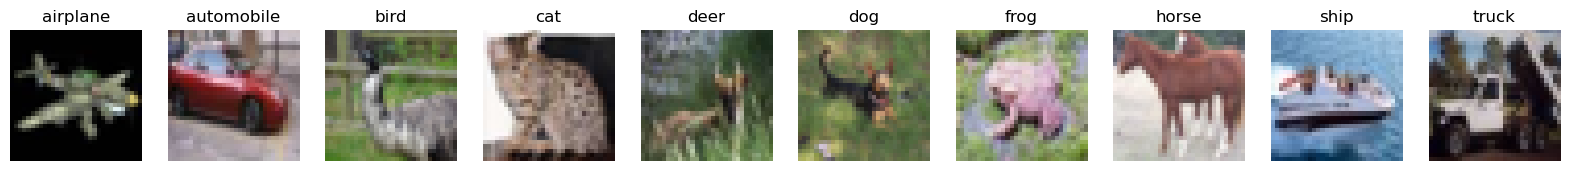

In [3]:
# Display a random image from each class
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, ax = plt.subplots(1, len(class_names), figsize=(20, 20))
for i in range(len(class_names)):
    class_indices = np.where(y_train == i)[0]
    random_index = random.choice(class_indices)
    ax[i].imshow(x_train[random_index])
    ax[i].axis('off')
    ax[i].set_title(class_names[i])
plt.show()

In [4]:
# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [5]:
# Custom callback to stop training when accuracy is above 95%
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_accuracy'] > 0.95:
            print(f'\nReached 95% validation accuracy. Stopping training.')
            self.model.stop_training = True
     

In [6]:
# Build the model
model = Sequential()
    # CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(10))
model.add(Activation('softmax'))

C:\Users\rajab\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
# Find the best epoch using early stopping and custom callback
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
cc = CustomCallback()
history = model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[es, cc])

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.3242 - loss: 1.8133 - val_accuracy: 0.5689 - val_loss: 1.2312
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5690 - loss: 1.2160 - val_accuracy: 0.6420 - val_loss: 1.0156
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6365 - loss: 1.0245 - val_accuracy: 0.6982 - val_loss: 0.8706
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6857 - loss: 0.8963 - val_accuracy: 0.7037 - val_loss: 0.8595
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.7140 - loss: 0.8171 - val_accuracy: 0.7428 - val_loss: 0.7431
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7385 - loss: 0.7431 - val_accuracy: 0.7512 - val_loss: 0.7297
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7523 - loss: 0.7051 - val_accuracy: 0.7626 - val_loss: 0.6861
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7657 - loss: 0.6642 - 

In [9]:
# Test the accuracy of the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7904 - loss: 0.6454
Test accuracy: 0.79
